In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )

In [3]:
pref["感染者数移動平均7"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).mean()

In [4]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)
pref = pd.merge(pref, pop, on="都道府県名", how="left")


In [5]:
pref["10万人あたり感染者数"] = pref["各地の感染者数_1日ごとの発表数"]/(pref["人口"]/100000)
pref["10万人あたり感染者数移動平均7"] = pref["10万人あたり感染者数"].rolling(7).mean()

### 感染者数前日比

In [33]:
import numpy as np
pref["感染者数前日比"] = pref["各地の感染者数_1日ごとの発表数"].pct_change()
# 一番古い日付だけNANを設定
pref.loc[pref["日付"]==pref["日付"].min(),"感染者数前日比"] = np.nan
pref["感染者数前日比移動平均7"] = pref["感染者数前日比"].rolling(7).mean()

In [34]:
pref.tail()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,感染者数移動平均7,人口,10万人あたり感染者数,10万人あたり感染者数移動平均7,感染者数前日比,感染者数前日比移動平均7
23072,2021-05-16,47,沖縄県,78,13859,0,141,110.714286,1481547,5.264767,7.472884,-0.512500,0.248989
23073,2021-05-17,47,沖縄県,59,13918,1,142,114.000000,1481547,3.982324,7.694660,-0.243590,0.307117
23074,2021-05-18,47,沖縄県,168,14086,4,146,119.142857,1481547,11.339499,8.041787,1.847458,0.190087
23075,2021-05-19,47,沖縄県,203,14289,0,146,132.571429,1481547,13.701894,8.948176,0.208333,0.244741
23076,2021-05-20,47,沖縄県,198,14487,1,147,142.857143,1481547,13.364409,9.642431,-0.024631,0.218942


In [20]:
pref.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23077 entries, 0 to 23076
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   日付                23077 non-null  datetime64[ns]
 1   都道府県コード           23077 non-null  int64         
 2   都道府県名             23077 non-null  object        
 3   各地の感染者数_1日ごとの発表数  23077 non-null  int64         
 4   各地の感染者数_累計        23077 non-null  int64         
 5   各地の死者数_1日ごとの発表数   23077 non-null  int64         
 6   各地の死者数_累計         23077 non-null  int64         
 7   感染者数移動平均7         23071 non-null  float64       
 8   人口                23077 non-null  int64         
 9   10万人あたり感染者数       23077 non-null  float64       
 10  10万人あたり感染者数移動平均7  23071 non-null  float64       
 11  感染者数前日比           15568 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 2.3+ MB


In [8]:
prefs = {
    "東京都": ("-",1.1),
    "大阪府": ("-",1.1),
    "京都府": ("-",1.1),
    "兵庫県": ("-",1.1),
    "愛知県": ("-",1.1),
    "福岡県": ("-",1.1),
    "北海道": ("-",1.1),
    "岡山県": ("-",1.1),
    "広島県": ("-",1.1),
    "埼玉県": ("--",1.0),
    "千葉県": ("--",1.0),
    "神奈川県": ("--",1.0),
    "沖縄県": ("--",1.0),
    "岐阜県": ("--",1.0),
    "愛媛県": ("--",1.0),
    "三重県": ("--",1.0),
    "石川県": ("--",1.0),
    "群馬県": ("--",1.0),
    "熊本県": ("--",1.0),
    "大分県": (":",1.0),
    "佐賀県": (":",1.0),
    "奈良県": (":",1.0),
    "宮城県": (":",1.0),
    "富山県": (":",1.0),
}

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


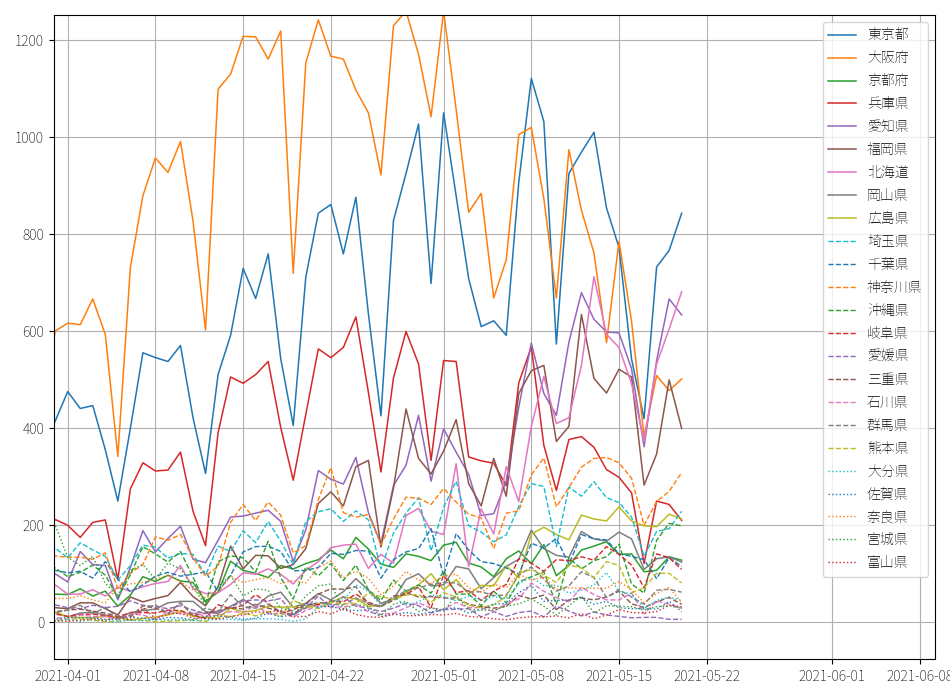

In [10]:
plt.figure(figsize=(9.5,7))
dates = pref["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref.loc[pref["都道府県名"]==p]["各地の感染者数_1日ごとの発表数"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


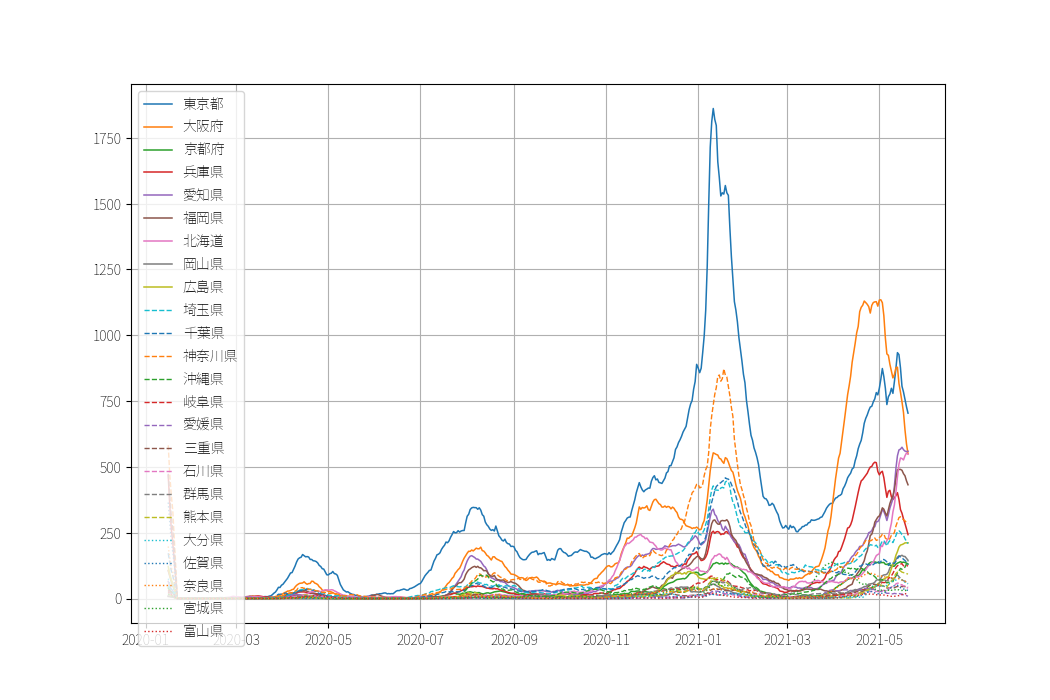

In [11]:
plt.figure(figsize=(10.5,7))
dates = pref["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref.loc[pref["都道府県名"]==p]["感染者数移動平均7"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


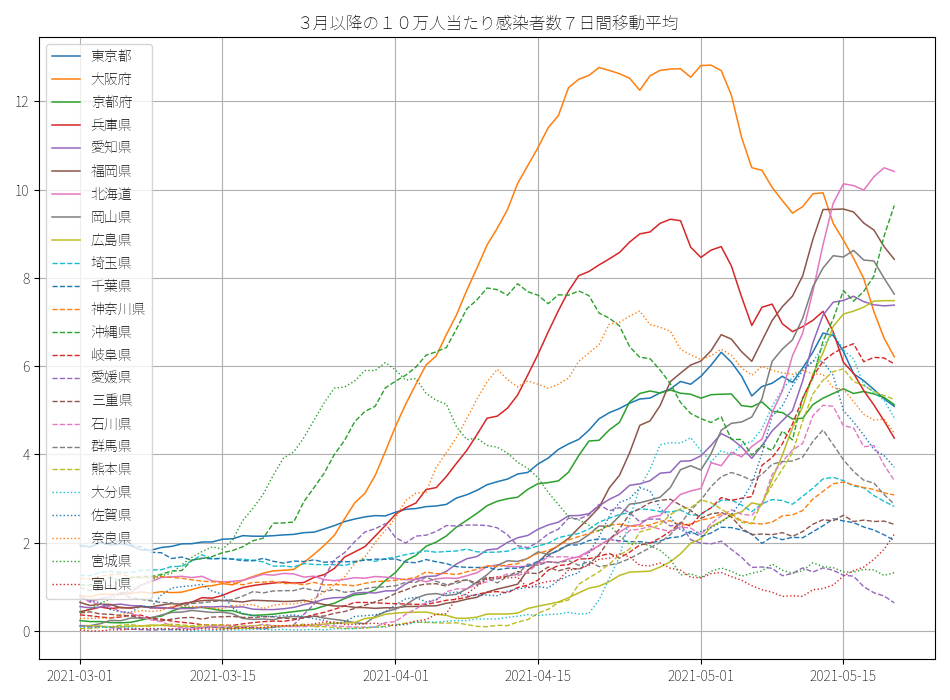

In [12]:
plt.figure(figsize=(9.5,7))
plt.title("３月以降の１０万人当たり感染者数７日間移動平均")
pref_latest = pref.loc[pref["日付"]>="20210301"]
dates = pref_latest["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref_latest.loc[pref_latest["都道府県名"]==p]["10万人あたり感染者数移動平均7"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend()
plt.tight_layout()

### 感染者数前日比

In [22]:
pref

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,感染者数移動平均7,人口,10万人あたり感染者数,10万人あたり感染者数移動平均7,感染者数前日比
0,2020-01-16,1,北海道,0,0,0,0,NaN,5267762,0.000000,NaN,NaN
1,2020-01-17,1,北海道,0,0,0,0,NaN,5267762,0.000000,NaN,NaN
2,2020-01-18,1,北海道,0,0,0,0,NaN,5267762,0.000000,NaN,NaN
3,2020-01-19,1,北海道,0,0,0,0,NaN,5267762,0.000000,NaN,NaN
4,2020-01-20,1,北海道,0,0,0,0,NaN,5267762,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23072,2021-05-16,47,沖縄県,78,13859,0,141,110.714286,1481547,5.264767,7.472884,-0.512500
23073,2021-05-17,47,沖縄県,59,13918,1,142,114.000000,1481547,3.982324,7.694660,-0.243590
23074,2021-05-18,47,沖縄県,168,14086,4,146,119.142857,1481547,11.339499,8.041787,1.847458
23075,2021-05-19,47,沖縄県,203,14289,0,146,132.571429,1481547,13.701894,8.948176,0.208333


<IPython.core.display.Javascript object>


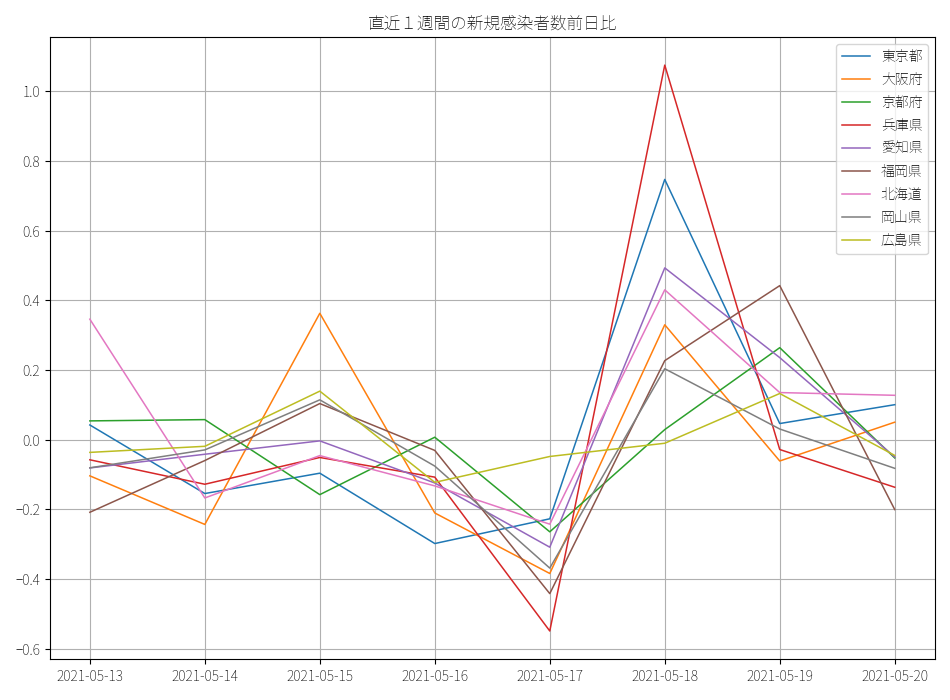

In [32]:
import datetime
plt.figure(figsize=(9.5,7))
plt.title("直近１週間の新規感染者数前日比")
latest_date = pref["日付"].max()+datetime.timedelta(days=-7)
pref_latest = pref.loc[pref["日付"]>=latest_date]
dates = pref_latest["日付"].unique()
for p in prefs:
    if prefs[p][0] == "-":
        plt.plot_date(dates,pref_latest.loc[pref_latest["都道府県名"]==p]["感染者数前日比"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend()
plt.tight_layout()

#### 直近１週間の新規感染者 増加速度 WORST10

In [39]:
pref.loc[pref["日付"]==pref["日付"].max()].sort_values("感染者数前日比移動平均7",ascending=False).head(10)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,感染者数移動平均7,人口,10万人あたり感染者数,10万人あたり感染者数移動平均7,感染者数前日比,感染者数前日比移動平均7
2454,2021-05-20,5,秋田県,9,727,0,11,11.000000,985416,0.913320,1.116280,0.285714,0.596366
981,2021-05-20,2,青森県,66,2099,0,27,29.142857,1275783,5.173294,2.284311,1.750000,0.431840
15711,2021-05-20,32,島根県,13,482,0,0,10.857143,679324,1.913667,1.598227,0.083333,0.420635
8837,2021-05-20,18,福井県,4,1008,0,34,5.142857,780053,0.512786,0.659296,-0.555556,0.404762
19148,2021-05-20,39,高知県,10,1198,0,20,8.428571,709230,1.409980,1.188412,-0.333333,0.365136
7855,2021-05-20,16,富山県,31,1613,1,34,23.142857,1055999,2.935609,2.191561,-0.088235,0.360556
17184,2021-05-20,35,山口県,47,2609,0,55,47.142857,1369882,3.430952,3.441381,-0.160714,0.262549
23076,2021-05-20,47,沖縄県,198,14487,1,147,142.857143,1481547,13.364409,9.642431,-0.024631,0.218942
14729,2021-05-20,30,和歌山県,10,2527,0,36,12.142857,954258,1.047935,1.272492,-0.285714,0.210534
12274,2021-05-20,25,滋賀県,54,4687,0,74,46.571429,1420948,3.800280,3.277490,0.148936,0.143629


#### 直近１週間の新規感染者 増加速度 BEST10(増加の低い順)

In [40]:
pref.loc[pref["日付"]==pref["日付"].max()].sort_values("感染者数前日比移動平均7",ascending=True).head(10)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,感染者数移動平均7,人口,10万人あたり感染者数,10万人あたり感染者数移動平均7,感染者数前日比,感染者数前日比移動平均7
18657,2021-05-20,38,愛媛県,5,2648,1,68,8.714286,1369131,0.365195,0.636483,0.000000,-0.158065
17675,2021-05-20,36,徳島県,4,1599,0,58,8.142857,742505,0.538717,1.096674,-0.200000,-0.085468
10801,2021-05-20,22,静岡県,59,7718,0,131,78.714286,3708556,1.590916,2.122505,-0.202703,-0.051980
5891,2021-05-20,12,千葉県,114,35934,1,659,129.571429,6319772,1.803863,2.050255,-0.136364,-0.032681
16202,2021-05-20,33,岡山県,123,6631,4,80,145.285714,1903627,6.461350,7.632047,-0.082090,-0.029499
22585,2021-05-20,46,鹿児島県,39,3025,0,28,37.571429,1630146,2.392424,2.304789,-0.025000,-0.026172
13256,2021-05-20,27,大阪府,501,96643,32,2068,549.857143,8849635,5.661250,6.213331,0.050314,-0.022169
14238,2021-05-20,29,奈良県,39,7514,0,100,60.714286,1353837,2.880701,4.484608,-0.450704,-0.021485
20621,2021-05-20,42,長崎県,14,2803,1,57,22.142857,1350769,1.036447,1.639278,-0.125000,-0.021096
20130,2021-05-20,41,佐賀県,21,2342,1,17,30.571429,823810,2.549131,3.710981,-0.500000,-0.019068
